# 📘 Proyecto de Ciencia de Datos  
## Análisis de la Relación entre Actividades y Parciales  

---

### 👩‍🎓 Estudiante: *Julieth Shirley Cruz Posada*  
### 📚 Asignatura: Ciencia de Datos  
### 🏫 Institución: *Corporación Universitaria del Huila*  
### 📅 Fecha: 3 de octubre 2025  

---



# 🧠 Foro 1: Análisis temporal aplicado a predicciones
### Tema: Limitaciones de los modelos ARIMA y Prophet

En este ejercicio práctico se analiza cómo los modelos **ARIMA** y **Prophet** permiten realizar predicciones de series temporales, pero también se identifican sus **limitaciones** cuando los datos presentan tendencias no lineales o patrones complejos.  

Se simula una serie de **demanda energética semanal**, y se aplican ambos modelos para comparar su desempeño y visualizar los resultados.  

**Objetivos:**
- Aplicar modelos ARIMA y Prophet sobre una serie temporal simulada.  
- Comparar visualmente las predicciones.  
- Reflexionar sobre las limitaciones de cada modelo y cómo podrían mitigarse.  

**Contexto:**  
Una empresa eléctrica busca prever el consumo energético semanal en distintas regiones. Los modelos temporales le ayudan a planificar la producción y evitar desperdicios, aunque su precisión puede verse afectada por cambios estacionales, ruido o factores externos no modelados.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


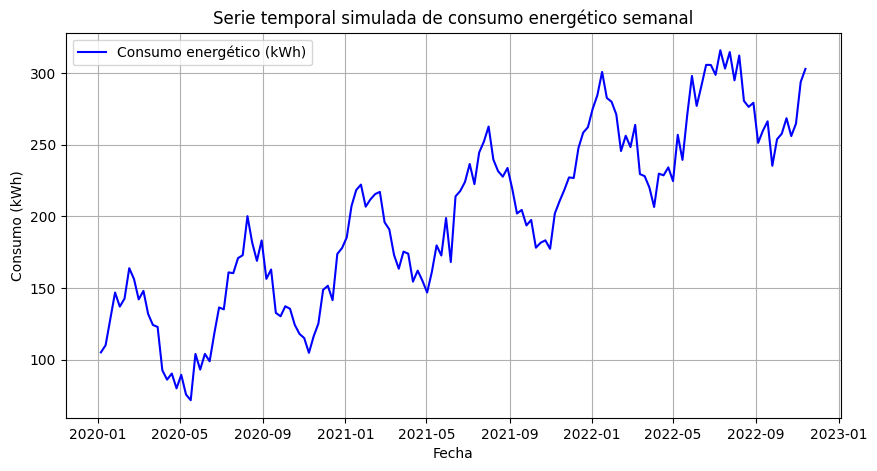

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [4]:
# ================================================
# 📊 FORO 1: Limitaciones de ARIMA y Prophet
# ================================================
# ✅ Versión compatible con Colab (sin pmdarima)
# ================================================

# 1️⃣ Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Crear carpeta
import os
ruta_guardado = '/content/drive/MyDrive/Ciencia-datos-2025-b-g1/FORO 1'
os.makedirs(ruta_guardado, exist_ok=True)

# 2️⃣ Instalar versiones estables y compatibles
!pip install numpy pandas matplotlib statsmodels prophet==1.1.5 --quiet

# 3️⃣ Importar librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# 4️⃣ Generar datos simulados de consumo energético semanal
np.random.seed(42)
fechas = pd.date_range(start='2020-01-01', periods=150, freq='W')
tendencia = np.linspace(100, 300, 150)
estacionalidad = 40 * np.sin(np.linspace(0, 12 * np.pi, 150))
ruido = np.random.normal(0, 10, 150)
consumo = tendencia + estacionalidad + ruido

df = pd.DataFrame({'ds': fechas, 'y': consumo})
df.to_csv(f"{ruta_guardado}/consumo_energetico.csv", index=False)

# 5️⃣ Visualización inicial
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'], label='Consumo energético (kWh)', color='blue')
plt.title('Serie temporal simulada de consumo energético semanal')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.grid(True)
plt.show()

# 6️⃣ Dividir datos en entrenamiento y prueba
train = df[:-20]
test = df[-20:]

# 7️⃣ MODELO A: ARIMA (más estable que pmdarima)
modelo_arima = ARIMA(train['y'], order=(3,1,2))
resultado_arima = modelo_arima.fit()
pred_arima = resultado_arima.forecast(steps=20)

# 8️⃣ MODELO B: Prophet
modelo_prophet = Prophet(yearly_seasonality=True, weekly_seasonality=False)
modelo_prophet.fit(train)
futuro = modelo_prophet.make_future_dataframe(periods=20, freq='W')
pronostico = modelo_prophet.predict(futuro)

# 9️⃣ Graficar comparación
plt.figure(figsize=(10,5))
plt.plot(df['ds'], df['y'], label='Datos reales', color='black')
plt.plot(test['ds'], pred_arima, label='Predicción ARIMA', linestyle='--', color='red')
plt.plot(pronostico['ds'], pronostico['yhat'], label='Predicción Prophet', linestyle=':', color='green')
plt.title('Comparación de modelos ARIMA y Prophet')
plt.xlabel('Fecha')
plt.ylabel('Consumo energético (kWh)')
plt.legend()
plt.grid(True)
plt.savefig(f"{ruta_guardado}/comparacion_ARIMA_Prophet.png", dpi=300)
plt.show()

# 🔎 Reflexión automática
print("""
💬 Reflexión:
- ARIMA necesita que la serie sea estacionaria, por lo que su rendimiento baja ante cambios bruscos o tendencias complejas.
- Prophet maneja mejor las estacionalidades, pero puede suavizar en exceso los datos o fallar si hay ruido alto.
👉 Una posible mejora es combinar modelos (por ejemplo, ARIMA + redes neuronales) para capturar patrones lineales y no lineales simultáneamente.
""")

# 🔟 Guardar resumen
with open(f"{ruta_guardado}/informe_limitaciones.txt", "w") as f:
    f.write("Comparación entre modelos ARIMA y Prophet sobre una serie temporal simulada.\n")
    f.write("Limitaciones:\n")
    f.write("- ARIMA requiere estacionariedad y falla ante no linealidades.\n")
    f.write("- Prophet simplifica patrones irregulares.\n")
    f.write("Sugerencia: combinar ambos con aprendizaje profundo.\n")

print("✅ Archivos guardados en tu carpeta FORO 1 de Google Drive.")
